In [193]:
#Starting implementation
import pandas as pd
import numpy as np

In [194]:
#Reading dataset and setting columns
df = pd.read_csv("/Users/jimmychu/Downloads/Lab_2/data/q1.csv")
df

,Tear Production,Sex,Age,Spectacle,Astigmatism,Recommendation
0,Reduced,M,Young,Myope,Yes,Lifestyle
1,Reduced,F,Old,Myope,No,Street
2,Normal,M,Old,Hypermetrope,Yes,Lifestyle
3,Normal,M,Young,Hypermetrope,No,Polarized
4,Reduced,F,Middle,Myope,No,Street
5,Normal,F,Middle,Hypermetrope,Yes,Lifestyle
6,Normal,M,Young,Hypermetrope,No,Polarized
7,Reduced,M,Young,Hypermetrope,Yes,Lifestyle
8,Normal,M,Old,Myope,No,Street
9,Normal,M,Middle,Myope,Yes,Polarized


In [195]:
x = df.values[:, 0:5]
y = df.values[:, 5]


In [196]:
feature_names = ['Tear Production', 'Sex', 'Age', 'Spectacle', 'Astigmatism']

In [197]:
x

array([['Reduced', 'M', 'Young', 'Myope', 'Yes'],
       ['Reduced', 'F', 'Old', 'Myope', 'No'],
       ['Normal', 'M', 'Old', 'Hypermetrope', 'Yes'],
       ['Normal', 'M', 'Young', 'Hypermetrope', 'No'],
       ['Reduced', 'F', 'Middle', 'Myope', 'No'],
       ['Normal', 'F', 'Middle', 'Hypermetrope', 'Yes'],
       ['Normal', 'M', 'Young', 'Hypermetrope', 'No'],
       ['Reduced', 'M', 'Young', 'Hypermetrope', 'Yes'],
       ['Normal', 'M', 'Old', 'Myope', 'No'],
       ['Normal', 'M', 'Middle', 'Myope', 'Yes'],
       ['Reduced', 'F', 'Middle', 'Myope', 'No'],
       ['Reduced', 'F', 'Old', 'Hypermetrope', 'Yes'],
       ['Normal', 'M', 'Young', 'Myope', 'No'],
       ['Reduced', 'F', 'Old', 'Hypermetrope', 'Yes'],
       ['Normal', 'F', 'Old', 'Hypermetrope', 'Yes']], dtype=object)

In [198]:
y

array(['Lifestyle', 'Street', 'Lifestyle', 'Polarized', 'Street',
       'Lifestyle', 'Polarized', 'Lifestyle', 'Street', 'Polarized',
       'Street', 'Polarized', 'Lifestyle', 'Polarized', 'Lifestyle'],
      dtype=object)

In [199]:
from sklearn import preprocessing
x.shape

(15, 5)

In [200]:
X2 = x
le_X = preprocessing.LabelEncoder()
X2[:, 0] = le_X.fit_transform(x[:, 0])
X2[:, 1] = le_X.fit_transform(x[:, 1])
X2[:, 2] = le_X.fit_transform(x[:, 2])
X2[:, 3] = le_X.fit_transform(x[:, 3])
X2[:, 4] = le_X.fit_transform(x[:, 4])
X2

array([[1, 1, 2, 1, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [0, 1, 2, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 2, 0, 0],
       [1, 1, 2, 0, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 1, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 2, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1]], dtype=object)

In [201]:
le_y = preprocessing.LabelEncoder()
y2 = le_y.fit_transform(y)
y2

array([0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0])

In [202]:
enc = preprocessing.OneHotEncoder()
enc.fit(X2)
X2_enc = enc.transform(X2).toarray()
X2_enc.shape

(15, 11)

In [203]:
type(X2_enc)

numpy.ndarray

In [204]:
X2_enc

array([[0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.]])

In [228]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion="entropy")
dtree.fit(X2_enc, y2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [265]:
#Preprocessing the data and split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x = df.values[:, 0:5]
y = df.values[:, 5]
trainX, testX, trainY, testY = train_test_split( x, y, test_size = 0)

In [266]:
#Step 1 - Choosing Model - Import class which is planned to use
from sklearn import tree

In [267]:
#Step 2 - Instantiate the estimator
dtree = tree.DecisionTreeClassifier(criterion="entropy")

In [268]:
#Step 3 - Fit model with data (Learning)
dtree.fit(trainX, trainY)
class_names = np.unique([str(i) for i in trainY])

In [271]:
#Step 4 - Predict the response for the testing set
Y_pred = dtree.predict(testX)
print(Y_pred)
print("Accuracy: \n", dtree.score(testX, testY))

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

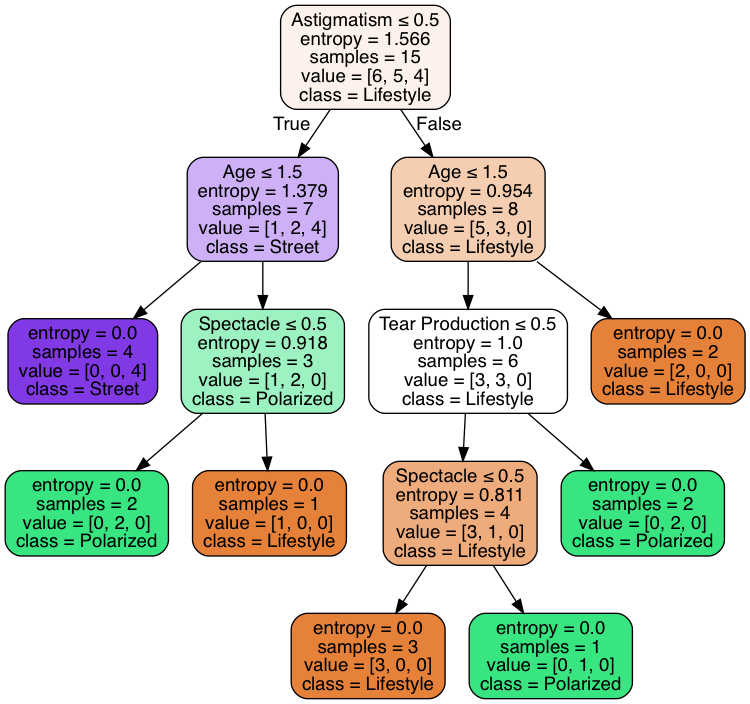

In [270]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True, class_names=class_names, feature_names=feature_names )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())